In [1]:
# import
import os,sys

import numpy as np
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append("../models/")
from model_utils import MyDataset,get_dataloader,train_val_test_split

In [5]:
# configuration
SAMPLE_SIZE = (8,4)
BATCH_SIZE = 16
LOOKBACK = 8
LOOKAHEAD = 4

mpl.rcParams['font.family'] = ['Times New Roman','SimSun'] 
mpl.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
mpl.rcParams['font.size'] = 9  # 按磅数设置的
mpl.rcParams['figure.dpi'] = 300
cm = 1/2.54  # centimeters in inches
mpl.rcParams['figure.figsize'] = (12*cm,8*cm)
mpl.rcParams['savefig.dpi'] = 900
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'both'
mpl.rcParams['axes.grid.which'] = 'both'
mpl.rcParams['axes.facecolor'] = 'white'

dataset_dir = "../results/experiment/dataset/"  # 结果保存目录
data_dir = "../data/training_data/standard/"  # 数据读取目录

dl_config = {'seed': 0,
             'data_dir': data_dir,
             'batch_size': 32,
             'lookback': 8,
             'lookahead': 4,
             'sample_size': (8,4),
             'num_workers': 2}

ds = MyDataset(dl_config)

In [ ]:
# 随机抽取样本
def get_some_data(dataset,num):
    indexes = np.random.choice(np.arange(len(dataset),dtype=int),num)
    return indexes

indexes = get_some_data(ds,100)

In [ ]:
# 抽样延误分布
train_delay = []
pbar = tqdm(total=len(indexes))
for index in indexes:
    train_delay.append(ds[index][1][0,0])
    pbar.update(1)
plt.hist(train_delay,bins=100)

In [14]:
train_delay = np.load(dataset_dir+'train_delay_data.npy')
val_delay = np.load(dataset_dir+'val_delay_data.npy')
test_delay = np.load(dataset_dir+'test_delay_data.npy')
print(train_delay.shape[0])
print(val_delay.shape[0])
print(test_delay.shape[0])

7048
881
882


Text(0, 0.5, 'Number')

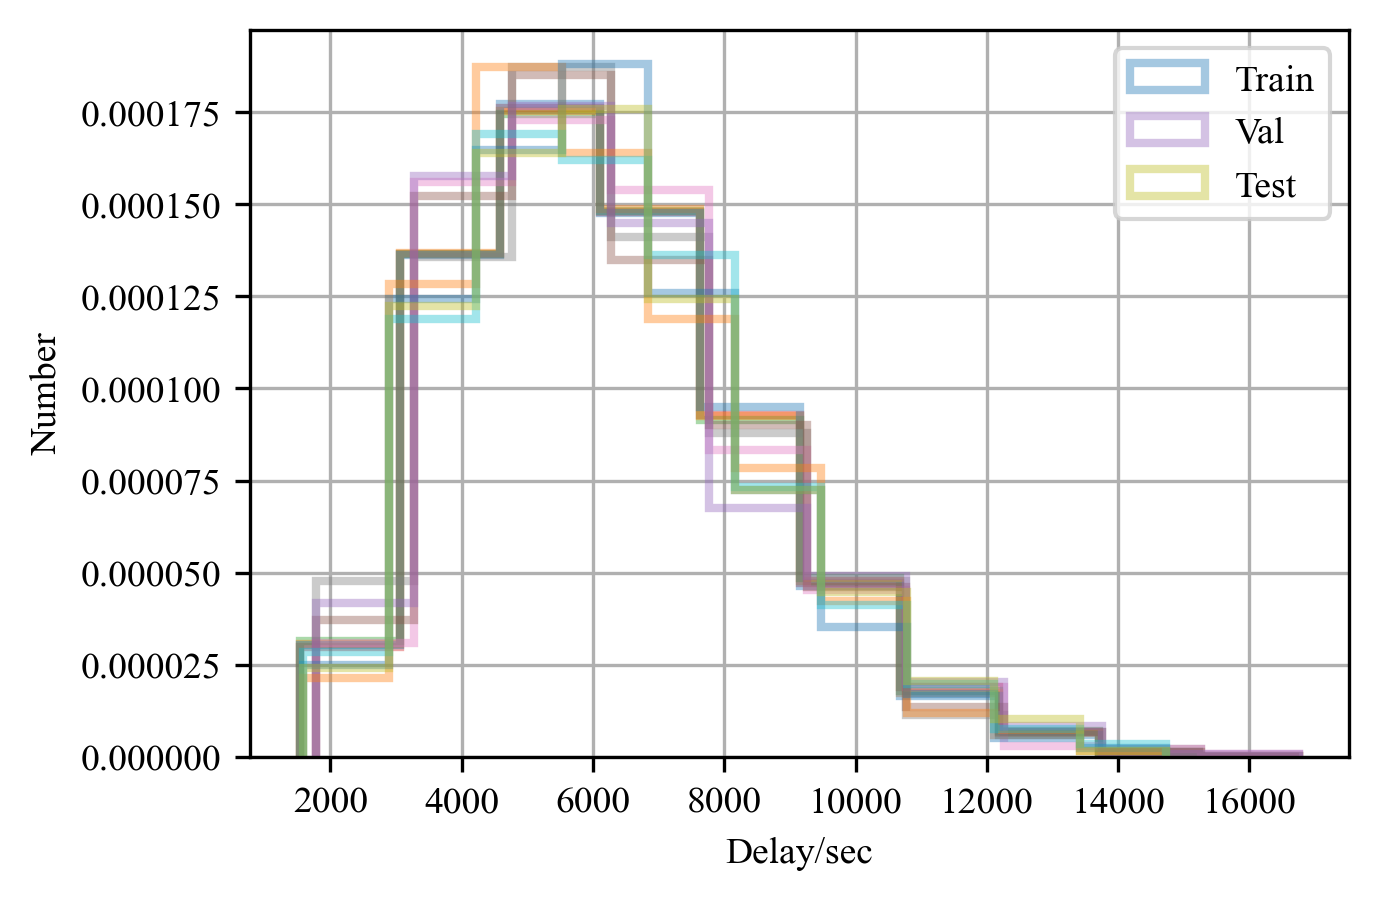

In [12]:
fig,ax = plt.subplots()
for k,v in {'Train':train_delay,'Val':val_delay,'Test':test_delay}.items():
    ax.hist(v,label=k,alpha=0.4,density=True,histtype='step',linewidth=2.0)
ax.legend()
ax.set_xlabel("Delay/sec")
ax.set_ylabel("Number")